In [1]:
#데이터 불러오기

import pandas as pd
df=pd.read_csv('C:/Users/db400tea/Downloads/한국자산관리공사_국유부동산 매각현황_20221231.csv', encoding='cp949')

In [2]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [3]:
#선택 분석 1번

# '처분구분명'을 기준으로 빈도 계산
disposal_counts = df['처분구분명'].value_counts()

# 전체 데이터 수
total_records = len(df)

# 비율 계산
disposal_ratios = disposal_counts / total_records

# 결과 출력
print("처분 구분별 비율:")
print(disposal_ratios)

처분 구분별 비율:
처분구분명
처분(매각수의)      0.881684
처분(매각입찰)      0.062512
처분(무상관리전환)    0.030350
처분(사용승인)      0.014789
처분(무상귀속)      0.004996
처분(무상양여)      0.004854
처분(유상관리전환)    0.000807
처분(유상양여)      0.000007
Name: count, dtype: float64


C:\Users\db400tea\AppData\Local\Temp\ipykernel_17128\2108430514.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_pct += float(f'{disposal_ratios[i]/total*100:.2f}')
C:\Users\db400tea\AppData\Local\Temp\ipykernel_17128\2108430514.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = f'{disposal_ratios[i]/total*100:.2f}%'
C:\Users\db400tea\AppData\Local\Temp\ipykernel_17128\2108430514.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

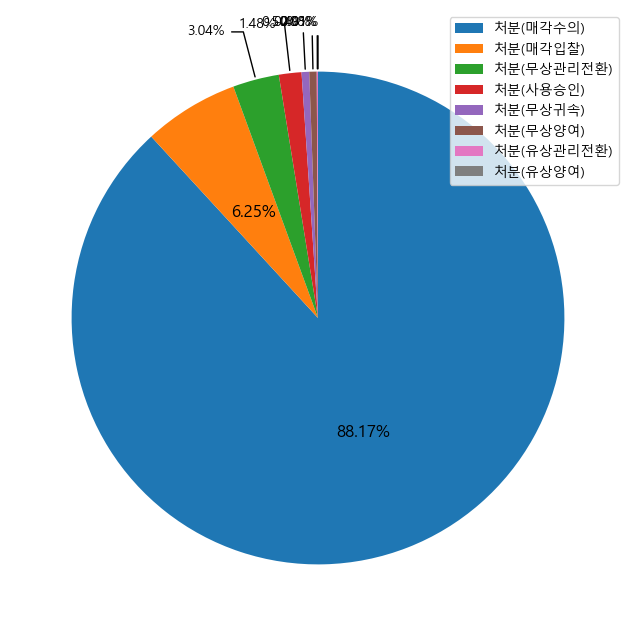

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
import numpy as np

fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
pie = ax.pie(disposal_ratios, startangle=90, counterclock=False, ) 
total = np.sum(disposal_ratios) 

threshold = 5 
sum_pct = 0 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) 
config = dict(arrowprops=dict(arrowstyle='-'), bbox=bbox_props,va='center') 

for i,l in enumerate(disposal_ratios.index):    
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if i < len(disposal_ratios.index) - 1:        
        sum_pct += float(f'{disposal_ratios[i]/total*100:.2f}')        
        text = f'{disposal_ratios[i]/total*100:.2f}%'    
        
    else: 
        text = f'{100-sum_pct:.2f}%'        
    
    if disposal_ratios[i]/total*100 < threshold:        
        ang = (ang1+ang2)/2 ## 중심각        
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표        
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표                ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬        
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]        
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일        
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ##         
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),                    
                    horizontalalignment=horizontalalignment, **config)    
        
    else:        
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표        
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표        
        ax.text(x,y,text,ha='center',va='center',fontsize=12)    
        
plt.legend(pie[0],disposal_ratios.index,loc='upper right') ## 범례
plt.show()

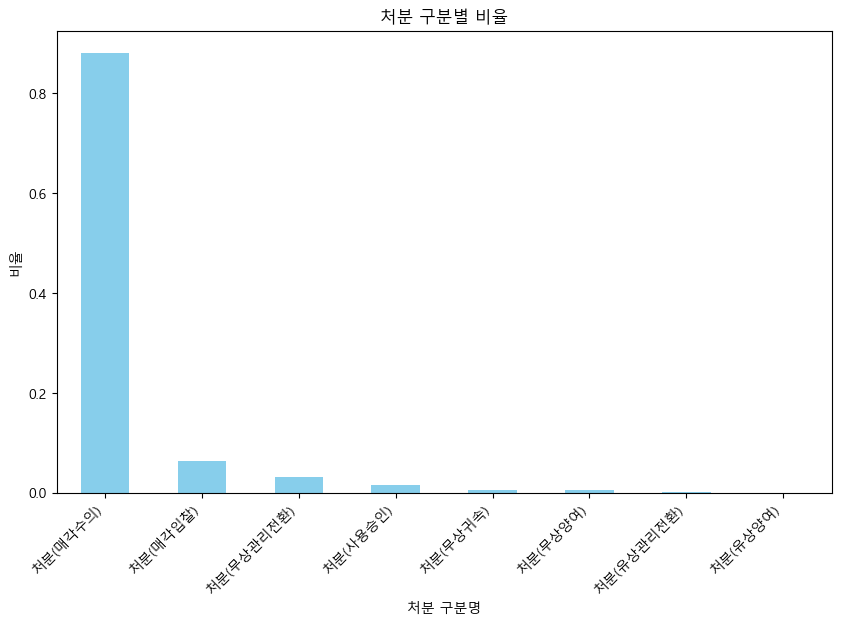

In [5]:
plt.rcParams['font.family'] ='Malgun Gothic'

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
disposal_ratios.plot(kind='bar', color='skyblue')
plt.title('처분 구분별 비율')
plt.xlabel('처분 구분명')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')  # x 축 눈금 레이블 회전 및 정렬
plt.show()

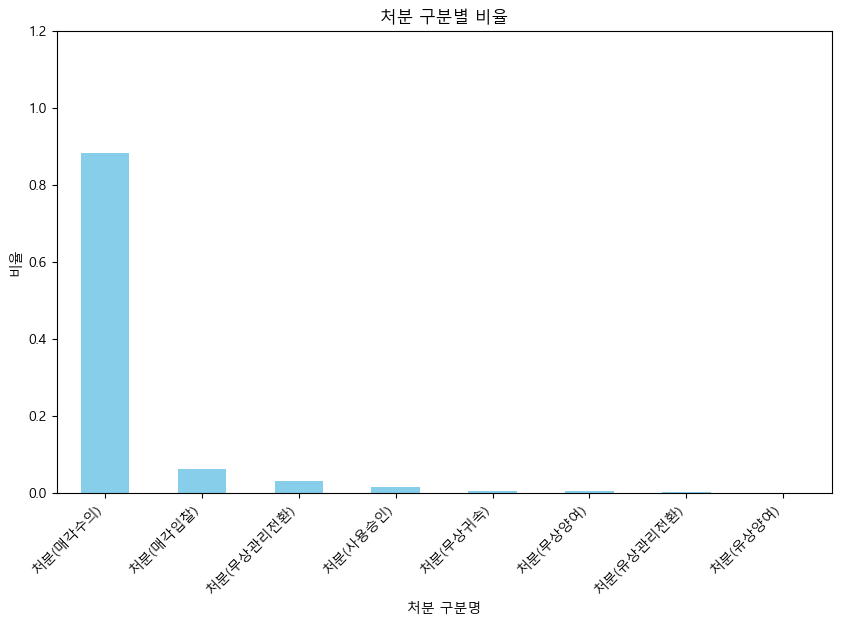

In [6]:
plt.rcParams['font.family'] ='Malgun Gothic'

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
ax = disposal_ratios.plot(kind='bar', color='skyblue')
plt.title('처분 구분별 비율')
plt.xlabel('처분 구분명')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')  # x 축 눈금 레이블 회전 및 정렬

# y 축 범위 조정
ax.set_ylim(0, 1.2)  # 원하는 범위로 조절

plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

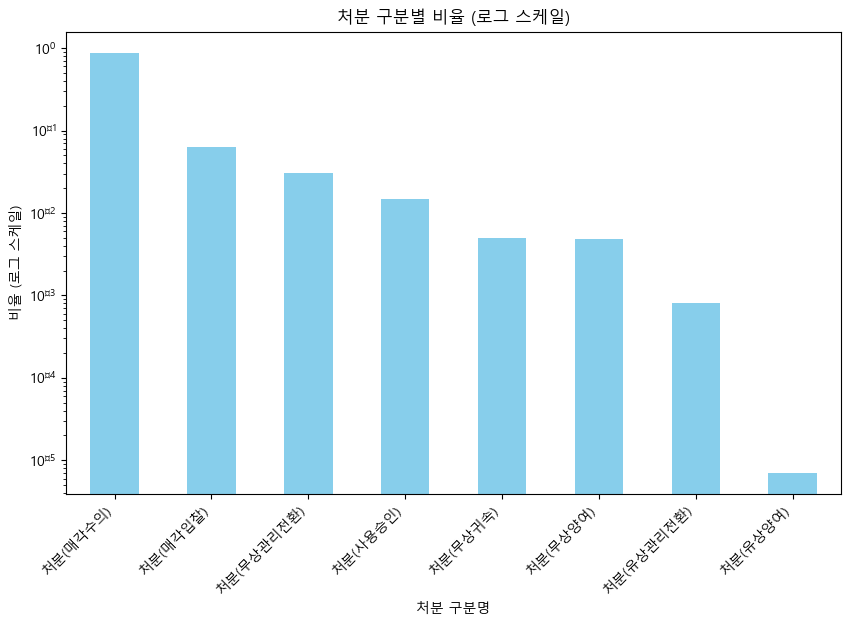

In [7]:
plt.rcParams['font.family'] ='Malgun Gothic'
import numpy as np

# 시각화 (막대 그래프, 로그 스케일)
plt.figure(figsize=(10, 6))
ax = disposal_ratios.plot(kind='bar', color='skyblue')
plt.title('처분 구분별 비율 (로그 스케일)')
plt.xlabel('처분 구분명')
plt.ylabel('비율 (로그 스케일)')
plt.yscale('log')  # y 축을 로그 스케일로 변경
plt.xticks(rotation=45, ha='right')  # x 축 눈금 레이블 회전 및 정렬

plt.show()

[데이터 정보]
- 연도구분:YYYY 형식의 연도
- 지역구분:시/도 정보
- 소재지명:지번
- 재산구분:건물 또는 토지로 분류
- 공부지목:용지 분류
- 대장면적(제곱미터):0 ~ 20만 가량의 범위
- 대장금액(원):0 ~ 220억 가량의 범위
- 처분구분명:처분 분류
- 계약일자:YYYY년 형식의 연도
- 부점명, 팀명

[필수분석]
1. 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기
2. 연도별 매각금액 추이 확인하기
3. 상위 5개 지역별 매각 면적 확인하기
4. 계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

[선택 분석]
1. 처분 구분별 비율 확인하기
2. 필수-3 항목을 지역 규모에 따라 보정하기
3. 필수-2 항목을 증감액 그래프로 표현하기*

In [8]:
#필수 분석 1번

# '팀명'을 기준으로 그룹화하여 대장금액의 총합 계산
team_total_assets = df.groupby('팀명')['대장금액(원)'].sum()

# 대장금액의 총합이 가장 많은 팀과 가장 적은 팀 구하기
max_assets_team = team_total_assets.idxmax()
min_assets_team = team_total_assets.idxmin()

# 대장금액 총합 차이 계산
difference = team_total_assets.max() - team_total_assets.min()

# 콤마 추가하여 결과 출력
max_assets_formatted = '{:,.0f}원'.format(team_total_assets.max())
min_assets_formatted = '{:,.0f}원'.format(team_total_assets.min())
difference_formatted = '{:,.0f}원'.format(difference)

print(f'매각금액의 총합이 가장 많은 팀: {max_assets_team} ({max_assets_formatted})')
print(f'매각금액의 총합이 가장 적은 팀: {min_assets_team} ({min_assets_formatted})')
print(f'매각금액의 총합 차이: {difference_formatted}')

매각금액의 총합이 가장 많은 팀: 국유재산3팀 (1,581,917,203,990원)
매각금액의 총합이 가장 적은 팀: 해안면무주지국유화지원추진단 (22,101,960원)
매각금액의 총합 차이: 1,581,895,102,030원


In [9]:
import pandas as pd

# 결과를 DataFrame으로 변환
result_df = pd.DataFrame({
    '팀명': [max_assets_team, min_assets_team, '차이'],
    '대장금액(원)': [team_total_assets[max_assets_team], team_total_assets[min_assets_team], difference]
})

# 대장금액(원)을 천 원 단위로 콤마 추가
result_df['대장금액(원)'] = result_df['대장금액(원)'].apply(lambda x: '{:,.0f}원'.format(x))

# 결과 출력
result_df

,팀명,대장금액(원)
0,국유재산3팀,"1,581,917,203,990원"
1,해안면무주지국유화지원추진단,"22,101,960원"
2,차이,"1,581,895,102,030원"


In [10]:
#필수 분석 1번

# '팀명'을 기준으로 그룹화하여 대장금액의 총합 계산
team_total_assets = df.groupby('팀명')['대장금액(원)'].sum()

# 대장금액의 총합이 가장 많은 팀과 가장 적은 팀 구하기
max_assets_team = team_total_assets.idxmax()
min_assets_team = team_total_assets.idxmin()

# 대장금액 총합 차이 계산
difference = team_total_assets.max() - team_total_assets.min()

# 콤마 추가하여 결과 출력
max_assets_formatted = '{:,.0f}천원'.format(team_total_assets.max())
min_assets_formatted = '{:,.0f}천원'.format(team_total_assets.min())
difference_formatted = '{:,.0f}천원'.format(difference)

max_assets_formatted 
min_assets_formatted
difference_formatted

'1,581,895,102,030천원'

In [11]:
# '팀명'을 기준으로 그룹화하여 대장금액의 총합 계산
team_total_assets = df.groupby('팀명')['대장금액(원)'].sum()

# 대장금액의 총합을 기준으로 내림차순 정렬
sorted_team_total_assets = team_total_assets.sort_values(ascending=False)

# 정렬된 결과를 데이터프레임으로 변환
sorted_team_total_assets_df = pd.DataFrame({'팀명': sorted_team_total_assets.index, '대장금액 총합(원)': sorted_team_total_assets.values})
sorted_team_total_assets_df['대장금액 총합(원)'] = sorted_team_total_assets_df['대장금액 총합(원)'].apply(lambda x: '{:,.0f}'.format(x))

sorted_team_total_assets_df

,팀명,대장금액 총합(원)
0,국유재산3팀,"1,581,917,203,990"
1,국유재산1팀,"899,128,271,160"
2,국유재산관리2팀,"850,425,540,110"
3,국유재산2팀,"785,818,592,477"
4,국유재산관리1팀,"733,823,449,808"
...,...,...
61,원주지부,"5,292,361,984"
62,춘천지부,"4,954,916,510"
63,국유통영지부,"2,835,397,438"
64,기획관리팀,"448,202,500"


In [12]:
#필수 분석 2번

# 연도별 매각금액 합계 계산
total_sales_by_year = df.groupby('연도구분')['대장금액(원)'].sum()

# 콤마 추가하여 결과 출력
total_sales_by_year_formatted = total_sales_by_year.map('{:,.0f}원'.format)
print("연도별 매각금액 합계:")
total_sales_by_year_formatted

연도별 매각금액 합계:


연도구분
2014      836,802,797,181원
2015    1,395,759,106,170원
2016      579,083,546,456원
2017      700,658,462,323원
2018      613,223,822,904원
2019      771,039,378,713원
2020      746,681,020,674원
2021    1,477,228,187,742원
2022    1,469,359,729,072원
Name: 대장금액(원), dtype: object

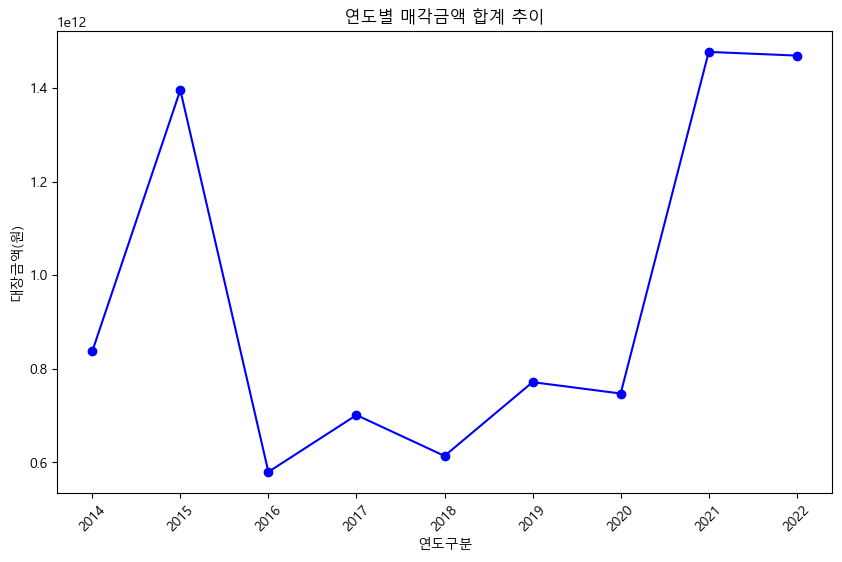

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(total_sales_by_year.index, total_sales_by_year.values, marker='o', linestyle='-', color='b')
plt.title('연도별 매각금액 합계 추이')
plt.xlabel('연도구분')
plt.ylabel('대장금액(원)')
plt.xticks(rotation=45)
plt.show()


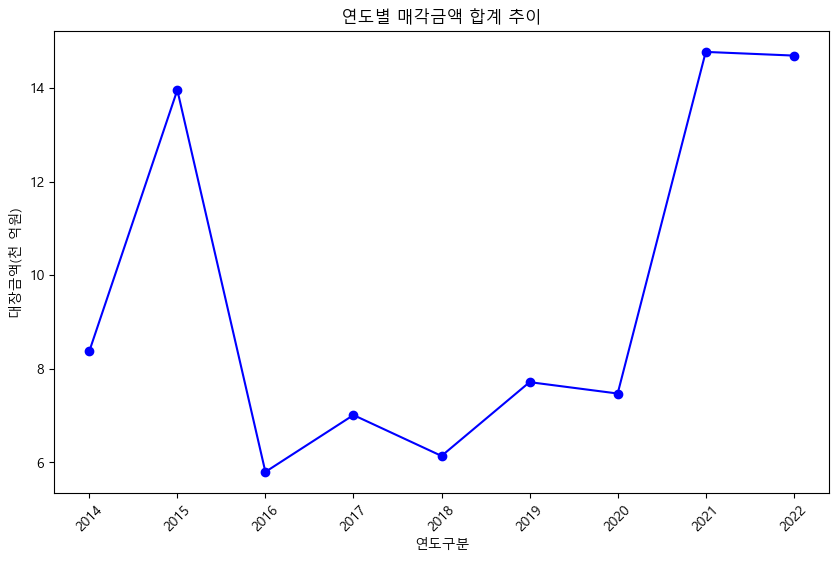

In [14]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(total_sales_by_year.index, total_sales_by_year.values, marker='o', linestyle='-', color='b')
plt.title('연도별 매각금액 합계 추이')
plt.xlabel('연도구분')
plt.ylabel('대장금액(천 억원)')

# y 축의 지수 표기법 해제
plt.ticklabel_format(style='plain', axis='y')

# y 축의 눈금 설정
plt.yticks([6e11, 8e11, 1e12, 1.2e12, 1.4e12], ['6', '8', '10', '12', '14'])

plt.xticks(rotation=45)
plt.show()

In [15]:
import pandas as pd

# 연도별 매각금액 합계 계산
total_sales_by_year = df.groupby('연도구분')['대장금액(원)'].sum()

# 데이터프레임으로 변환
result_df = pd.DataFrame({
    '연도구분': total_sales_by_year.index,
    '매각금액 합계': total_sales_by_year.map('{:,.0f}원'.format)
})

result_df

,연도구분,매각금액 합계
연도구분,,
2014,2014,"836,802,797,181원"
2015,2015,"1,395,759,106,170원"
2016,2016,"579,083,546,456원"
2017,2017,"700,658,462,323원"
2018,2018,"613,223,822,904원"
2019,2019,"771,039,378,713원"
2020,2020,"746,681,020,674원"
2021,2021,"1,477,228,187,742원"
2022,2022,"1,469,359,729,072원"


In [16]:
import pandas as pd

# 연도별 매각금액 합계 계산
total_sales_by_year = df.groupby('연도구분')['대장금액(원)'].sum()

# 데이터프레임으로 변환
result_df = pd.DataFrame({
    '연도구분': total_sales_by_year.index,
    '매각금액 합계': total_sales_by_year
})

# '매각금액 합계': total_sales_by_year.map('{:,.0f}원'.format)

# 인덱스 리셋
result_df.reset_index(drop=True, inplace=True)

# 결과 출력
result_df

,연도구분,매각금액 합계
0,2014,836802797181
1,2015,1395759106170
2,2016,579083546456
3,2017,700658462323
4,2018,613223822904
5,2019,771039378713
6,2020,746681020674
7,2021,1477228187742
8,2022,1469359729072


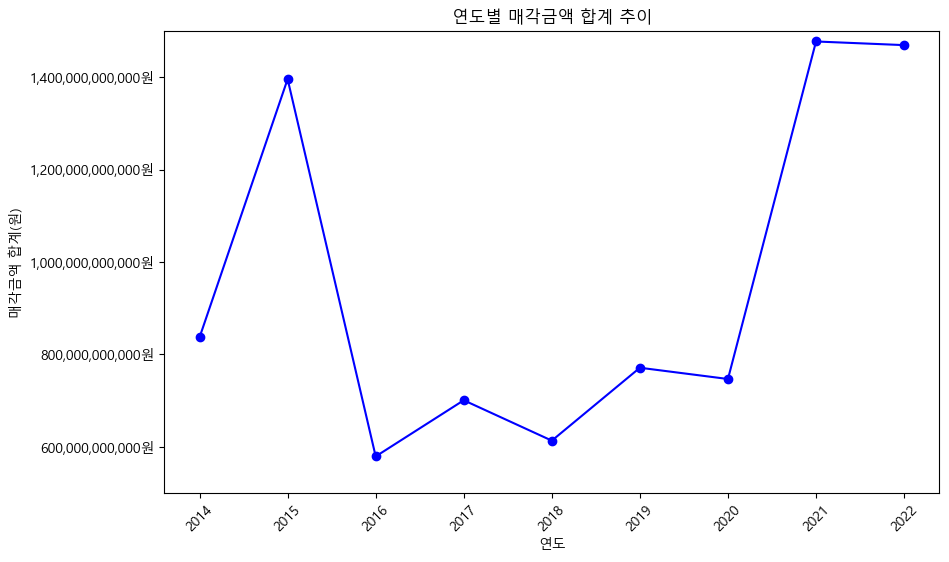

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rc('font', family='Malgun Gothic')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(result_df['연도구분'], result_df['매각금액 합계'], marker='o', linestyle='-', color='b')
plt.title('연도별 매각금액 합계 추이')
plt.xlabel('연도')
plt.ylabel('매각금액 합계(원)')

# y-axis 범위 설정
plt.ylim(500000000000, 1500000000000)

# y-axis 포매팅 설정 (5억 단위)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}원'.format(x)))

plt.xticks(rotation=45)
plt.show()

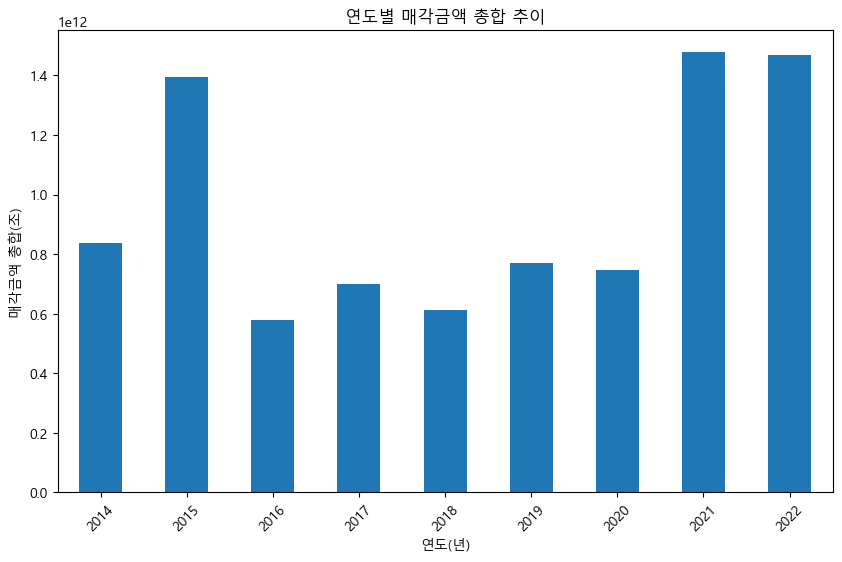

In [18]:
#선택 분석 3번

# 연도별 매각금액 총합 계산
yearly_total_assets = result_df.groupby('연도구분')['매각금액 합계'].sum()

# 그래프 그리기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(10, 6))
yearly_total_assets.plot(kind='bar')
plt.title('연도별 매각금액 총합 추이')
plt.xlabel('연도(년)')
plt.ylabel('매각금액 총합(조)')
plt.xticks(rotation=45)

plt.show()

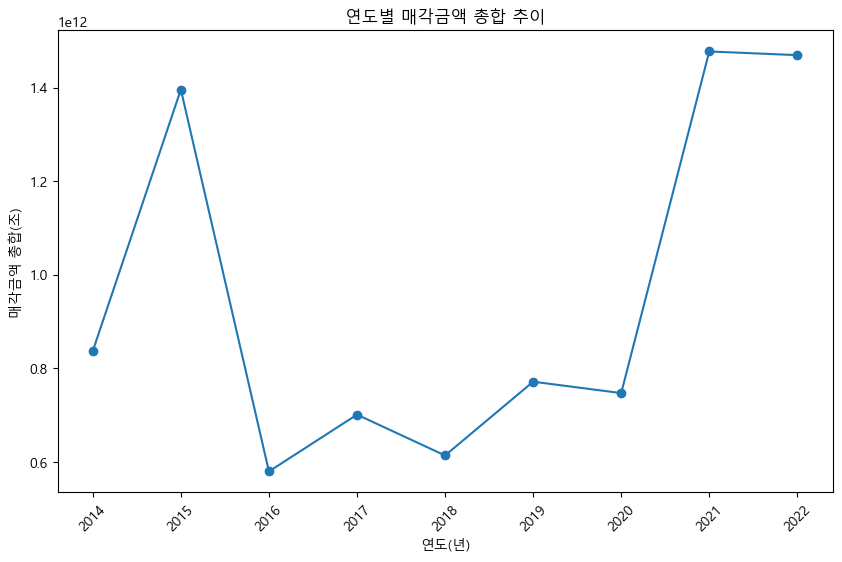

In [19]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(10, 6))
yearly_total_assets.plot(kind='line', marker='o')  # Changed 'bar' to 'line'
plt.title('연도별 매각금액 총합 추이')
plt.xlabel('연도(년)')
plt.ylabel('매각금액 총합(조)')
plt.xticks(rotation=45)

plt.show()

C:\Users\db400tea\AppData\Local\Temp\ipykernel_17128\2232392055.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='연도구분', y='대장금액(원)', marker='o', ci=None)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

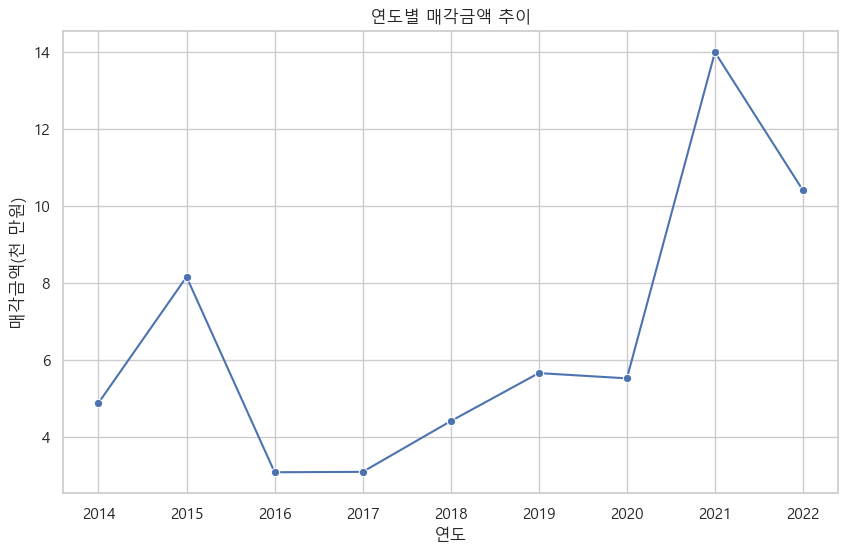

In [20]:
#선택 분석 3번

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic')
sns.lineplot(data=df, x='연도구분', y='대장금액(원)', marker='o', ci=None)

# y 축의 지수 표기법 해제
plt.ticklabel_format(style='plain', axis='y')

# 대장금액의 단위를 '천 만원'으로 표시하는 함수 정의
def format_million_won(x, pos):
    return f'{int(x/10000000)}'

# y 축의 눈금을 '천 만원' 단위로 표시
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_million_won))

plt.title('연도별 매각금액 추이')
plt.xlabel('연도')
plt.ylabel('매각금액(천 만원)')
plt.show()

In [21]:
#필수 분석 3번

# '지역구분'을 기준으로 그룹화하여 대장면적의 합 계산
area_sum_by_region = df.groupby('지역구분')['대장면적(제곱미터)'].sum()

# 대장면적의 합이 많은 상위 5개 지역 구하기
top_5_regions = area_sum_by_region.sort_values(ascending=False).head(5)

# 결과 출력
print("상위 5개 지역별 매각 면적:")
print(top_5_regions)

상위 5개 지역별 매각 면적:
지역구분
강원도     1.335531e+07
경기도     1.122648e+07
전라남도    9.388505e+06
충청남도    8.580610e+06
경상북도    7.117241e+06
Name: 대장면적(제곱미터), dtype: float64


In [22]:
import pandas as pd

# '지역구분'을 기준으로 그룹화하여 대장면적의 합 계산
area_sum_by_region = df.groupby('지역구분')['대장면적(제곱미터)'].sum()

# 대장면적의 합이 많은 상위 5개 지역 구하기
top_5_regions = area_sum_by_region.sort_values(ascending=False).head(5)

# 결과를 DataFrame으로 변환
result_df = pd.DataFrame({
    '지역구분': top_5_regions.index,
    '대장면적 합계(제곱미터)': top_5_regions.values
})

# 인덱스 리셋 및 결과 출력
result_df.reset_index(drop=True, inplace=True)
result_df

,지역구분,대장면적 합계(제곱미터)
0,강원도,1.335531e+07
1,경기도,1.122648e+07
2,전라남도,9.388505e+06
3,충청남도,8.580610e+06
4,경상북도,7.117241e+06


In [23]:
#선택 분석 2번

# '지역구분'을 기준으로 그룹화하여 대장면적의 합과 건수 계산
area_sum_count_by_region = df.groupby('지역구분')['대장면적(제곱미터)'].agg(['sum', 'count'])

# 평균 대장면적 계산 (보정된 지역 규모)
area_sum_count_by_region['평균대장면적'] = area_sum_count_by_region['sum'] / area_sum_count_by_region['count']

# 평균 대장면적의 합이 많은 상위 5개 지역 구하기
top_5_regions_adjusted = area_sum_count_by_region['평균대장면적'].sort_values(ascending=False).head(5)

# 결과 출력
print("상위 5개 지역별 보정된 매각 면적:")
print(top_5_regions_adjusted)

상위 5개 지역별 보정된 매각 면적:
지역구분
강원도        1107.313817
충청남도        990.946944
충청북도        764.096355
전라남도        715.423664
제주특별자치도     707.290613
Name: 평균대장면적, dtype: float64


In [24]:
import pandas as pd

# '지역구분'을 기준으로 그룹화하여 대장면적의 합과 건수 계산
area_sum_count_by_region = df.groupby('지역구분')['대장면적(제곱미터)'].agg(['sum', 'count'])

# 평균 대장면적 계산 (보정된 지역 규모)
area_sum_count_by_region['평균대장면적'] = area_sum_count_by_region['sum'] / area_sum_count_by_region['count']

# 평균 대장면적의 합이 많은 상위 5개 지역 구하기
top_5_regions_adjusted = area_sum_count_by_region['평균대장면적'].sort_values(ascending=False).head(5)

# 결과를 DataFrame으로 변환
result_df_adjusted = pd.DataFrame({
    '지역구분': top_5_regions_adjusted.index,
    '평균대장면적 합계': top_5_regions_adjusted.values
})

# 인덱스 리셋 및 결과 출력
result_df_adjusted.reset_index(drop=True, inplace=True)
result_df_adjusted

,지역구분,평균대장면적 합계
0,강원도,1107.313817
1,충청남도,990.946944
2,충청북도,764.096355
3,전라남도,715.423664
4,제주특별자치도,707.290613


In [25]:
#필수 분석 4번

import pandas as pd

# 계약일자를 날짜 형식으로 변환
df['계약일자'] = pd.to_datetime(df['계약일자'], format='%Y-%m-%d')

# '년도' 열을 추가하여 년도 추출
df['년도'] = df['계약일자'].dt.year

# 년도별 총 건수 계산
total_count_by_year = df.groupby('년도').size()

# 총 건수가 많은 순으로 정렬
sorted_df = total_count_by_year.sort_values(ascending=False).reset_index(name='총 매각 건수')

# 결과를 표로 출력
print("계약년도를 기준으로 총 매각 건수가 많은 순으로 정렬:")
print(sorted_df.to_string(index=False))   #인덱스를 표시하지 않도록 설정

계약년도를 기준으로 총 매각 건수가 많은 순으로 정렬:
  년도  총 매각 건수
2017    23306
2016    18853
2015    17228
2014    17155
2019    14700
2018    14178
2022    14128
2020    12331
2021     9235
2010       65
2013       42
2011       30
2007       17
2009       15
2008       11
2012        9
2006        4
2000        4
2001        2
2005        2
2002        2


In [26]:
import pandas as pd

# 계약일자를 날짜 형식으로 변환
df['계약일자'] = pd.to_datetime(df['계약일자'], format='%Y-%m-%d')

# '년도' 열을 추가하여 년도 추출
df['년도'] = df['계약일자'].dt.year

# 년도별 총 건수 계산
total_count_by_year = df.groupby('년도').size()

# 총 건수가 많은 순으로 정렬
sorted_df = total_count_by_year.sort_values(ascending=False).reset_index(name='총 매각 건수')

# 결과를 DataFrame으로 변환
result_df = pd.DataFrame(sorted_df)

# 인덱스 리셋 및 결과 출력
result_df.reset_index(drop=True, inplace=True)
result_df

,년도,총 매각 건수
0,2017,23306
1,2016,18853
2,2015,17228
3,2014,17155
4,2019,14700
5,2018,14178
6,2022,14128
7,2020,12331
8,2021,9235
9,2010,65


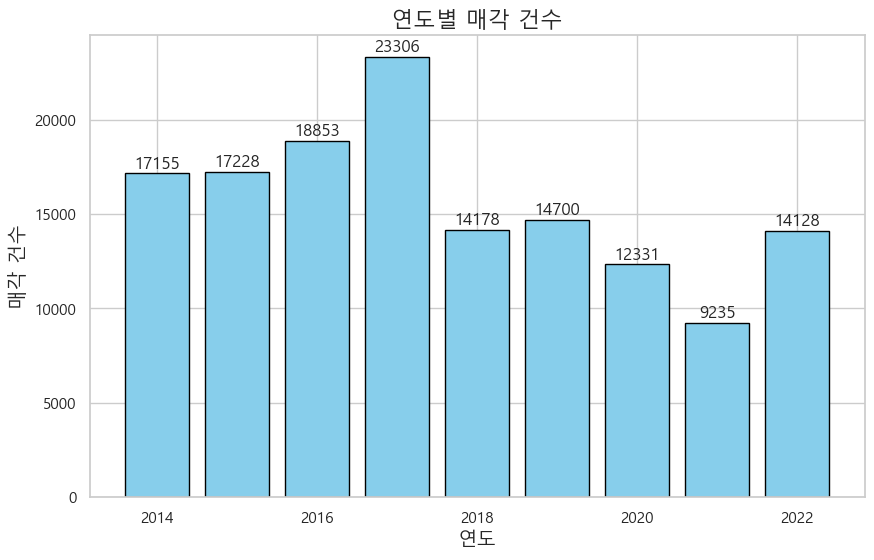

In [27]:
import matplotlib.pyplot as plt

# 주어진 데이터
years = [2017, 2016, 2015, 2014, 2019, 2018, 2022, 2020, 2021]
sales_counts = [23306, 18853, 17228, 17155, 14700, 14178, 14128, 12331, 9235]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
plt.bar(years, sales_counts, color='skyblue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 매각 건수', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('매각 건수', fontsize=14)

# 그래프에 값 표시
for i, value in enumerate(sales_counts):
    plt.text(years[i], value + 50, str(value), ha='center', va='bottom')

# 그래프 출력
plt.show()

<필수 문제 4에서 가능한 가설들>

1. 년도별 부동산 시장의 성장률:
- 가설: "부동산 시장이 성장하고 있는 년도에는 매각 건수가 높을 것이다."
- 검증 방법: 각 년도의 계약 건수와 매각 건수를 비교하여 년도별 성장률을 계산하고 시각화한다.

2. 경제 지표와의 연관성:
- 가설: "경제 지표가 양호한 년도에는 부동산 매각 건수가 더 높을 것이다."
- 검증 방법: 다른 데이터 소스에서 해당 년도의 경제 지표를 가져와서 부동산 매각 건수와의 연관성을 분석한다.

3. 금리 변동과의 관계:
- 가설: "금리가 낮은 년도에는 부동산 매각 건수가 증가할 것이다."
- 검증 방법: 해당 년도의 금리 정보를 가져와서 금리와 부동산 매각 건수 간의 관계를 분석한다.
-> 우리가 부동산가격과 금리에 대해 이야기할 때는, 금리가 부동산가격에 영향을 미친다고 보는 것이 일반적입니다. 한국은행이 기준금리를 인상하면 시중은행들도 따라서 대출금리를 올립니다. 그러면 대출을 받아 부동산을 구입하는 사람의 부담이 늘어나기 때문에 부동산에 대한 사람들의 수요가 줄고, 부동산 가격은 하락하게 됩니다. 반대로 이자율이 하락하면 사람들이 대출을 늘려 부동산을 구입하려 하기 때문에 부동산에 대한 사람들의 수요가 늘고, 부동산가격은 상승합니다.

4. 정책 변화와의 연관성:
- 가설: "부동산 관련 정책이 변경된 년도에는 매각 건수에 영향을 미칠 것이다."
- 검증 방법: 해당 년도에 시행된 부동산 관련 정책을 확인하고, 정책 변화와 매각 건수 간의 연관성을 분석한다.

In [28]:
sorted_df['년도'].unique()

array([2017, 2016, 2015, 2014, 2019, 2018, 2022, 2020, 2021, 2010, 2013,
       2011, 2007, 2009, 2008, 2012, 2006, 2000, 2001, 2005, 2002])

In [29]:
sorted_df['총 매각 건수'].unique()

array([23306, 18853, 17228, 17155, 14700, 14178, 14128, 12331,  9235,
          65,    42,    30,    17,    15,    11,     9,     4,     2],
      dtype=int64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


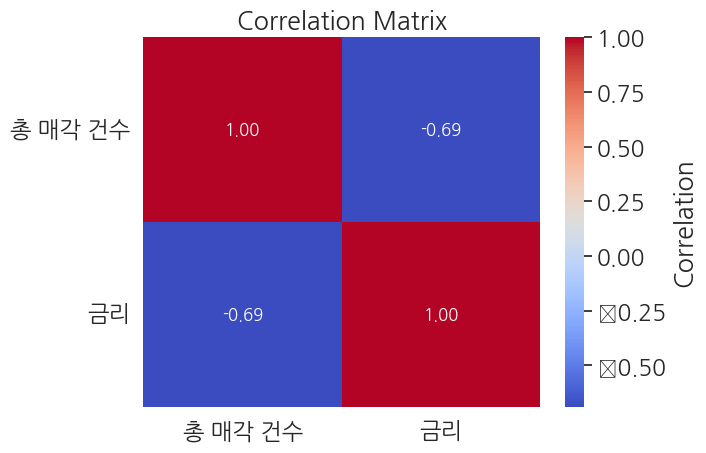

Pearson 상관 계수: -0.6900
P-value: 0.0005


In [30]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
sns.set(font="NanumGothic")
sns.set(font_scale=1.5)
plt.rcParams['font.family'] = 'NanumGothic'

# 가상의 데이터프레임 생성 (실제 데이터를 사용하도록 수정 필요)
data = {
    '년도': sorted_df['년도'],
    '총 매각 건수': sorted_df['총 매각 건수'],
}

# 년도별 금리 값을 추가 (가상의 데이터)
data['금리'] = [1.5, 1.25, 1.5, 2, 1.25, 1.75, 3.25, 0.5, 1, 2.5, 2.5, 3.25, 5, 2, 3, 2.75, 4.5, 5.25, 4, 3.75, 4.25]

df = pd.DataFrame(data)

# 상관 행렬 계산
correlation_matrix = df[['총 매각 건수', '금리']].corr()

# seaborn을 사용하여 상관 행렬 히트맵 그리기
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12},
                      xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
                      cbar_kws={'label': 'Correlation'})  # colorbar label 추가

# X축과 Y축에 레이블이 표시되도록 함
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Correlation Matrix')
plt.show()

# Pearson 상관 계수와 p-value 계산
corr_coef, p_value = pearsonr(df['총 매각 건수'], df['금리'])
print(f"Pearson 상관 계수: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")